Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/  
Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее  
Методом nesterov momentum  
Методом rmsprop  
Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

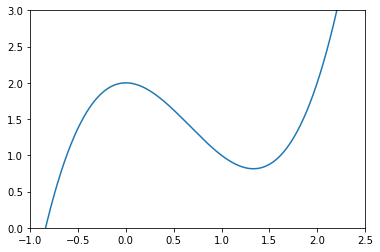

In [139]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

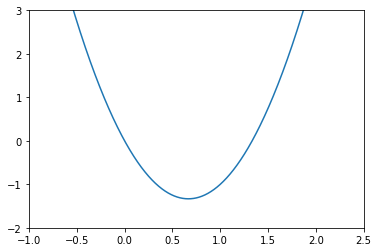

In [116]:
f_prime = lambda x: 3*x**2-4*x
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

In [58]:
lr = 0.1
points = [2]
n_epochs = 15

In [14]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [15]:
y_points = [f(p) for p in points]


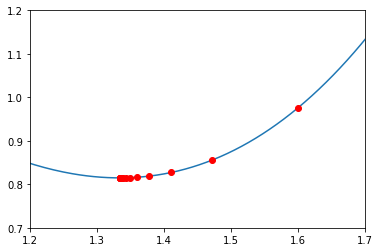

In [16]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([1.2,1.7])
plt.ylim([0.7,1.2])
plt.show()

### Методом rmsprop

<img src="rmsprop.png"/>

E[g] — moving average of squared gradients. dC/dw — gradient of the cost function with respect to the weight. n — learning rate. Beta — moving average parameter (good default value — 0.9)

In [96]:
lr = 0.1
points = [2]
w_ = [0]
n_epochs = 15

In [97]:
grad_squared = 0
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    grad_squared = 0.9 * grad_squared + 0.1 * grad * grad
    w = w_[-1]
    w = w - (lr / np.sqrt(grad_squared)) * grad
    w_.append(w)


In [98]:
y_points = [f(w) for w in w_]

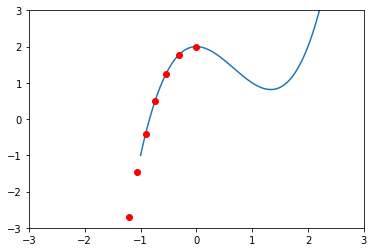

In [99]:
plt.plot(x,f(x))
plt.plot(w_, y_points, 'ro')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

### Почему спуск пошел в другую сторону?

In [106]:
import math

In [144]:
lr = 0.1
points = [2]
lambda_prev = 0
lambda_curr = 1
gamma = 1
y_prev = points[-1]
n_epochs = 15

In [145]:
for _ in range(n_epochs):
    cur_point = points[-1]
    new_point = cur_point - lr * grad
    cur_point = (1 - gamma) * new_point + gamma * y_prev
    y_prev = new_point
    points.append(cur_point)
    
    lambda_tmp = lambda_curr
    lambda_curr = (1 + math.sqrt(1 + 4 * lambda_prev * lambda_prev)) / 2
    lambda_prev = lambda_tmp

    gamma = (1 - lambda_prev) / lambda_curr


In [146]:
y_points = [f(p) for p in points]
y_points

[2,
 2.0,
 0.976,
 0.8480000000000001,
 1.43333747416002,
 1.98403380406411,
 1.0255205060782817,
 -3.7406819484095273,
 -17.50700056220815,
 -43.5855833695727,
 -94.47507850617218,
 -173.15911971579476,
 -304.3952812572251,
 -488.49822245725977,
 -768.9829459269888,
 -1139.9716971044193]

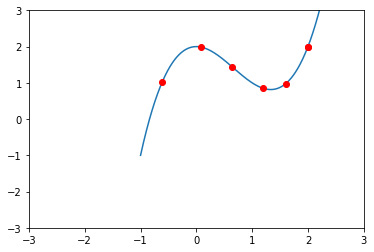

In [147]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()